2ユニットのWilson-Cowanモデルを実装し，

興奮性細胞に定常入力を加え，安定した状態に対して200msから400msに

これは $w_{\mathrm{EE}} > 1$ の場合に観察される現象である．$w_{\mathrm{EE}} < 1$ であれば，興奮性細胞だけで活動は安定する（リーク項により，活動が減少するため）．

https://www.sciencedirect.com/science/article/pii/S0896627309002876
を参考に作成した．

興奮性が強いのか，どうかは以下の論文によって示された．
fig3参照
https://elifesciences.org/articles/54875

In [1]:
using PyPlot
rc("axes.spines", top=false, right=false)
rc("font", family="Arial")

$$
\begin{aligned}
\tau_\mathrm{E} \frac{\mathrm{d}y_\mathrm{E}(t)}{\mathrm{d}t} &= -y_\mathrm{E}(t) + f_\mathrm{E} \left[w_\mathrm{EE} y_\mathrm{E}(t) - w_\mathrm{EI} y_\mathrm{I}(t) + x_\mathrm{E}(t) \right] \\
\tau_\mathrm{I} \frac{\mathrm{d}y_\mathrm{I}(t)}{\mathrm{d}t} &= -y_\mathrm{I}(t) + f_\mathrm{I} \left[w_\mathrm{IE} y_\mathrm{E}(t) - w_\mathrm{II} y_\mathrm{I}(t) + x_\mathrm{I}(t) \right]
\end{aligned}
$$


In [18]:
relu(x) = max(0.0, x) # ReLU function

function wilson_cowan(x, W, f, dt, τ, nt)
    α = dt ./ τ 
    y = zeros(nt, 2)  # activities: E, I
    for t in 1:nt-1
        y[t+1, :] = (1 .- α) .* y[t, :] + α.* f.(W * y[t, :] + x[t, :])
    end
    return y
end;

wilson_cowan (generic function with 1 method)

In [71]:
relu(x) = max(0.0, x) # ReLU function

function wilson_cowan(x, W, f, dt, τ, nt)
    α = dt ./ τ 
    y = zeros(nt, 2)  # activities: E, I
    for t in 1:nt-1
        y[t+1, :] = (1 .- α) .* y[t, :] + α.* f.(W * y[t, :] + x[t, :])
    end
    return y
end;

T = 600 # simulation time [ms]
dt = 1  # time steps [ms]
nt = round(Int, T/dt) # num. time steps
time = 1:dt:nt # time array

W = [2 -4; 6 -6] # weights: [w_EE W_EI; W_IE W_II]
τ = [60, 12]     # time constant: E, I [ms]

x = zeros(nt, 2)  # Inputs: E, I
x[:, 1] .+= 1     # Exc. inputs
ts, te = 200, 400 # inh. stimuli start:end
x[ts:te, 2] .+= 1 # Inh. inputs
y = wilson_cowan(x, W, relu, dt, τ, nt);

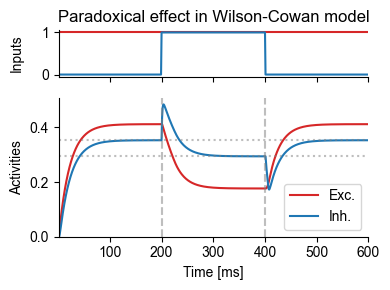

In [72]:
fig, axes = subplots(2, 1, figsize=(4,3), height_ratios=[1, 3], sharex=true)
axes[1].set_title("Paradoxical effect in Wilson-Cowan model")
axes[1].plot(time, x[:, 1], label="Exc.", color="tab:red")
axes[1].plot(time, x[:, 2], label="Inh.", color="tab:blue")
axes[1].set_ylabel("Inputs"); 

axes[2].plot(time, y[:, 1], label="Exc.", color="tab:red")
axes[2].plot(time, y[:, 2], label="Inh.", color="tab:blue")
axes[2].axhline(y[ts-1, 2], color="tab:gray", linestyle="dotted", alpha=0.5)
axes[2].axhline(y[te+1, 2], color="tab:gray", linestyle="dotted", alpha=0.5)
axes[2].axvline(ts, color="tab:gray", linestyle="dashed", alpha=0.5)
axes[2].axvline(te, color="tab:gray", linestyle="dashed", alpha=0.5)
axes[2].set_xlabel("Time [ms]"); axes[2].set_ylabel("Activities"); 
axes[2].set_xlim(time[1], time[end]); axes[2].set_ylim(0, ); 
axes[2].legend()
fig.align_ylabels()
tight_layout()

200msで抑制性細胞に刺激が加わると，一過性に抑制性細胞の活動が上昇し，興奮性細胞への抑制入力が大きくなった．元の活動は上の点線レベルであったのが，逆説的効果により，興奮性入力が加わっているにも関わらず，抑制性細胞の活動は下の点線レベルにまで低下した．逆に，400msにおいて抑制性細胞への入力をなくした場合には，抑制性細胞の活動は増加した．